<a href="https://colab.research.google.com/github/iArunava/Notebooks/blob/master/Adversarial%20Machine%20Learning/Introduction_to_Adversarial_Machine_Learning_Floydhub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Adversarial Machine Learning

In this notebook, we are gonna talk about Adversarial Machine Learning, specifically, Adversarial Attacks and Defences. We are going to use a library called `scratchai` which is built by me. And is currently under development. This notebook complements the Floydhub blog which can be found here []()

Please go through the blog, to get a better understanding of what's happening behind the scences.

## Install scratchai

In [6]:
import logging as LOG
import torch
!pip install scratchai-nightly==0.0.1a3
from scratchai import *

In [0]:
LOG.basicConfig(level=LOG.WARN)

Import a Resnet-18 and set it to eval mode.

In [0]:
net = nets.resnet18().eval()

Check that the net is giving satisfactory results with an Image of a Gorilla

![](https://i.ytimg.com/vi/wxA2Avc-oj4/maxresdefault.jpg)

In [8]:
one_call.classify('https://i.ytimg.com/vi/wxA2Avc-oj4/maxresdefault.jpg', nstr=net)

('gorilla, Gorilla gorilla', 20.226850509643555)

## Noise Attack



Load the image that we are going to attack on

In [0]:
i1 = imgutils.load_img('https://i.ytimg.com/vi/wxA2Avc-oj4/maxresdefault.jpg')
trf = imgutils.get_trf('rz256_cc224_tt_normimgnet')
i1 = trf(i1)

Create an Adversarial Image using the Noise Attack

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


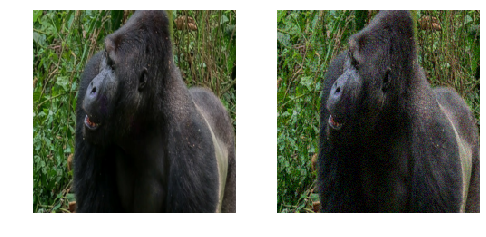

In [54]:
adv_x = attacks.noise(i1)
imgutils.imshow([i1, adv_x], normd=True)

Check the prediction of the adversarial image with the net we have.

In [0]:
def show_class_and_confidence(adv_x):
  confidences = net(adv_x.unsqueeze(0))
  class_idx = torch.argmax(confidences, dim=1).item()
  print (datasets.labels.imagenet_labels[class_idx], ' | ', confidences[0, class_idx].detach().item())

In [57]:
show_class_and_confidence(adv_x)

gorilla, Gorilla gorilla  |  16.433744430541992


Let's try add some more noise and see.

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


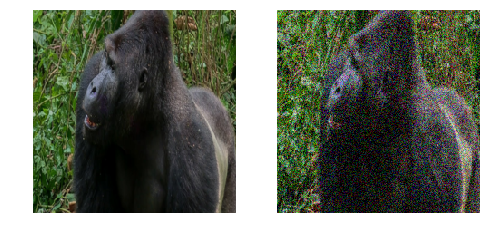

In [59]:
adv_x = attacks.noise(i1, eps=1.)
imgutils.imshow([i1, adv_x], normd=True)

Let's check for what its predicted as.

In [60]:
show_class_and_confidence(adv_x)

gorilla, Gorilla gorilla  |  11.536731719970703


Let's add some more noise and see.

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


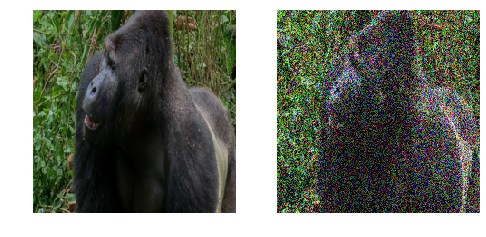

In [61]:
adv_x = attacks.noise(i1, eps=2.)
imgutils.imshow([i1, adv_x], normd=True)

Let check for the predicted label.

In [62]:
show_class_and_confidence(adv_x)

fountain  |  11.958776473999023


AND BOOM! The Network fails to give a correct prediction!

## Semantic Attack

Let's perform a semantic attack on the same image.

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


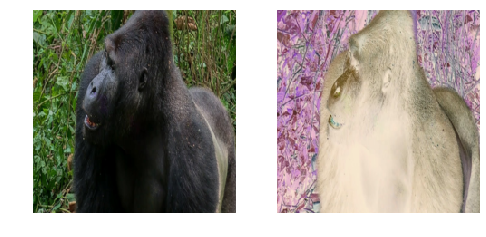

In [63]:
adv_x = attacks.semantic(i1)
imgutils.imshow([i1, adv_x], normd=True)

Let see what it is predicted as

In [64]:
show_class_and_confidence(adv_x)

Weimaraner  |  9.375173568725586


ANNNNND, it falied!

Let's try it on another image.

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


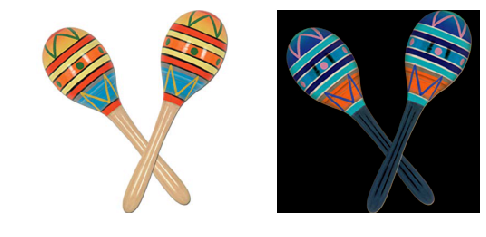

maraca  |  21.58343505859375
maraca  |  13.263277053833008


In [65]:
i1 = trf(imgutils.load_img('https://images-na.ssl-images-amazon.com/images/I/61dZAVY7vFL._SX425_.jpg'))
adv_x = attacks.semantic(i1)
imgutils.imshow([i1, adv_x], normd=True)
show_class_and_confidence(i1)
show_class_and_confidence(adv_x)

Do note, that it doesn't always fail!

## Fast Gradient Sign Method

FGSM is a gradient based attack and in these attacks we don't updatd the gradients of the net. So, let freeze the parameters of the net.

In [0]:
utils.freeze(net)

Now, let go on to perform an attack on the image using this net.

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


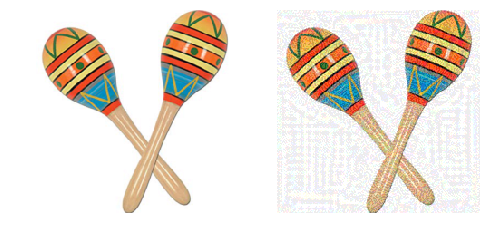

In [67]:
adv_x = attacks.fgm(i1, net)
imgutils.imshow([i1, adv_x], normd=True)

In [68]:
show_class_and_confidence(adv_x)

mitten  |  10.499775886535645


And the network, fails again!

There's a function in `scratchai` that will help to easily perform this attacks on the images. Let's try our hands on that.

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): upload.wikimedia.org:443
DEBUG:urllib3.connectionpool:https://upload.wikimedia.org:443 "GET /wikipedia/commons/a/a4/White-tiger-2407799_1280.jpg HTTP/1.1" 200 375952
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplot

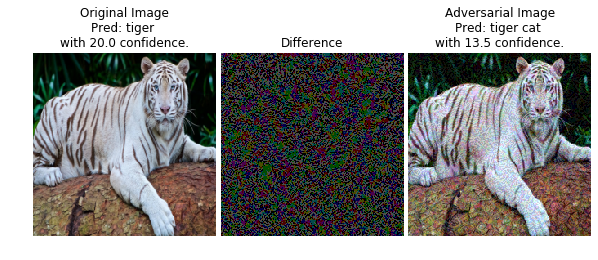

In [29]:
one_call.attack('https://upload.wikimedia.org/wikipedia/commons/a/a4/White-tiger-2407799_1280.jpg', atk=attacks.FGM)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): blog.worldofangus.com:80
DEBUG:urllib3.connectionpool:http://blog.worldofangus.com:80 "GET /wp-content/uploads/2016/09/african-wild-dog-1332236_1920-770x510.jpg HTTP/1.1" 200 49115
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


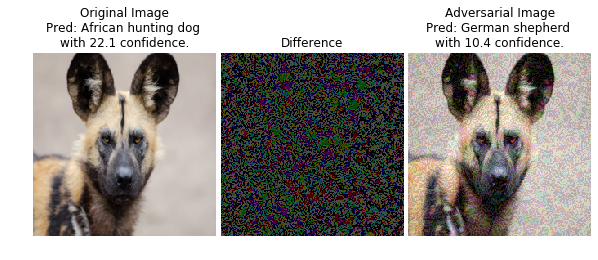

In [30]:
one_call.attack('http://blog.worldofangus.com/wp-content/uploads/2016/09/african-wild-dog-1332236_1920-770x510.jpg', atk=attacks.FGM)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): blog.autointhebox.com:80
DEBUG:urllib3.connectionpool:http://blog.autointhebox.com:80 "GET /wp-content/uploads/2015/04/How-to-choose-the-right-mirror-for-your-car.jpg HTTP/1.1" 200 254413
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


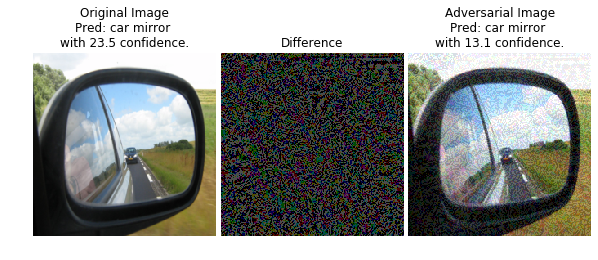

In [31]:
one_call.attack('http://blog.autointhebox.com/wp-content/uploads/2015/04/How-to-choose-the-right-mirror-for-your-car.jpg', atk=attacks.FGM)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): static.independent.co.uk:443
DEBUG:urllib3.connectionpool:https://static.independent.co.uk:443 "GET /s3fs-public/thumbnails/image/2017/03/21/14/childrenmaypolecreditalamy-0.jpg HTTP/1.1" 200 300637
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


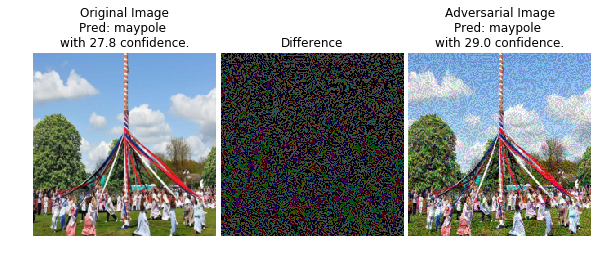

In [32]:
one_call.attack('https://static.independent.co.uk/s3fs-public/thumbnails/image/2017/03/21/14/childrenmaypolecreditalamy-0.jpg', atk=attacks.FGM)

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


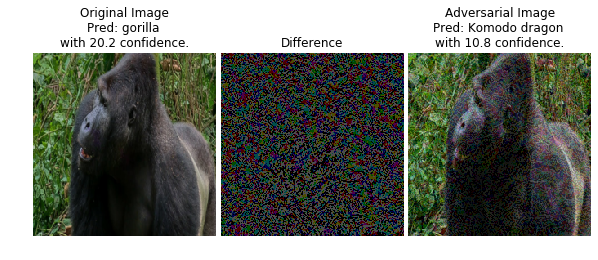

In [33]:
one_call.attack('https://i.ytimg.com/vi/C0Rugzrpgv8/maxresdefault.jpg', atk=attacks.FGM)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): volleyball.theteamfactory.com:443
DEBUG:urllib3.connectionpool:https://volleyball.theteamfactory.com:443 "GET /wp-content/uploads/sites/5/2016/02/socks-royal.png HTTP/1.1" 200 None
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'tEXt' 41 25
DEBUG:PIL.PngImagePlugin:STREAM b'iTXt' 78 802
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 892 296554
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


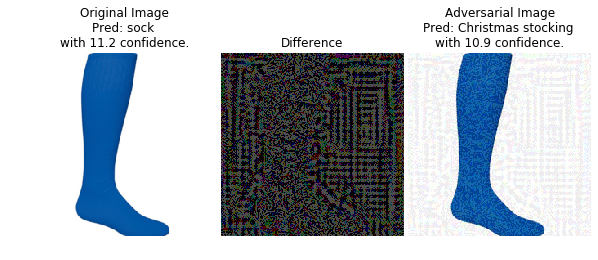

In [34]:
one_call.attack('https://volleyball.theteamfactory.com/wp-content/uploads/sites/5/2016/02/socks-royal.png', atk=attacks.FGM)

## Projected Gradient Descent Attack

This is basically the iterative version of the FGSM attack.

Let's load up and image and perform an attack.

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): 3c1703fe8d.site.internapcdn.net:443
DEBUG:urllib3.connectionpool:https://3c1703fe8d.site.internapcdn.net:443 "GET /newman/csz/news/800/2018/baboon.jpg HTTP/1.1" 200 None
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


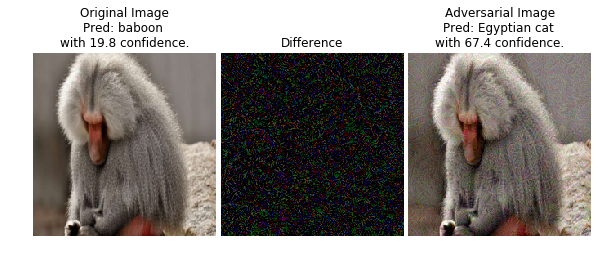

In [35]:
one_call.attack('https://3c1703fe8d.site.internapcdn.net/newman/csz/news/800/2018/baboon.jpg', atk=attacks.PGD)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): kids.sandiegozoo.org:443
DEBUG:urllib3.connectionpool:https://kids.sandiegozoo.org:443 "GET /sites/default/files/2018-07/animal-hero-hamadryas_0.jpg HTTP/1.1" 200 210725
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


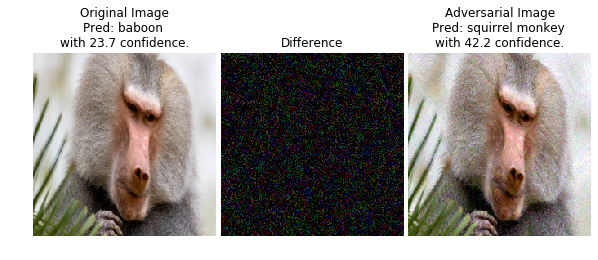

In [36]:
one_call.attack('https://kids.sandiegozoo.org/sites/default/files/2018-07/animal-hero-hamadryas_0.jpg', atk=attacks.PGD)

PGD is a targetted attack, so next we will perform a targetted attack!! Exciting!!

P.S. With `scratchai` for `PGD`, all you have to do is just mention a parameter `y` for the `one_call.classify` function that we keep calling.

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


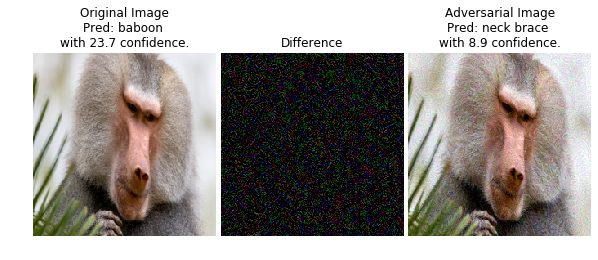

In [37]:
one_call.attack('https://kids.sandiegozoo.org/sites/default/files/2018-07/animal-hero-hamadryas_0.jpg', atk=attacks.PGD, y=678)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): static.terro.com:80
DEBUG:urllib3.connectionpool:http://static.terro.com:80 "GET /media/articles/images/440/29-cicada-season.jpg HTTP/1.1" 200 197471
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


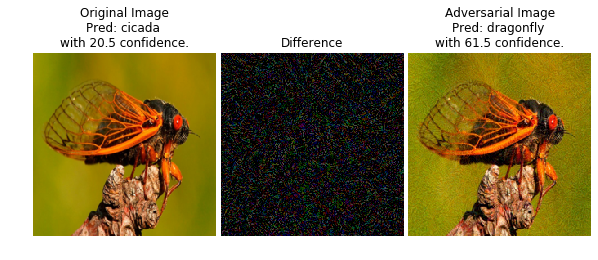

In [38]:
one_call.attack('http://static.terro.com/media/articles/images/440/29-cicada-season.jpg', atk=attacks.PGD)

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


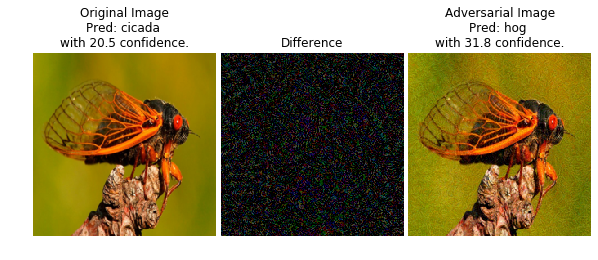

In [39]:
one_call.attack('http://static.terro.com/media/articles/images/440/29-cicada-season.jpg', atk=attacks.PGD, y=341)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): gvzoo.com:443
DEBUG:urllib3.connectionpool:https://gvzoo.com:443 "GET /cms-data/gallery/blog/animals/hippopotamus/hippo-library-2.jpg HTTP/1.1" 200 296507
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


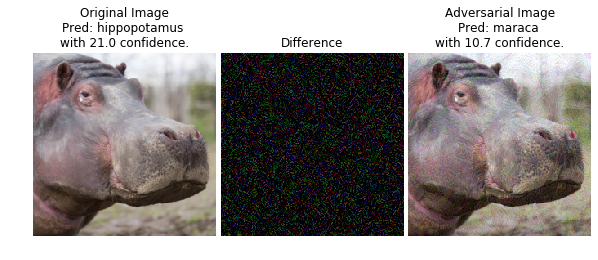

In [41]:
one_call.attack('https://gvzoo.com/cms-data/gallery/blog/animals/hippopotamus/hippo-library-2.jpg', atk=attacks.PGD, y=641)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): i.pinimg.com:443
DEBUG:urllib3.connectionpool:https://i.pinimg.com:443 "GET /236x/f8/9b/7f/f89b7f0cf2f0a052506926cff26578bf--house-stairs-bannister-ideas.jpg HTTP/1.1" 200 8007
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


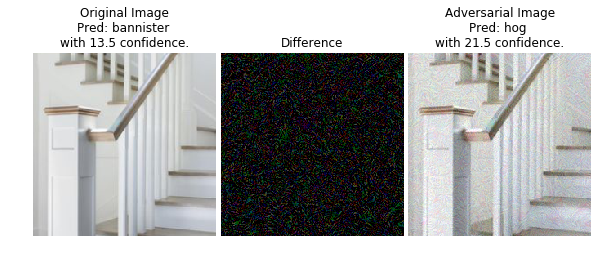

In [42]:
one_call.attack('https://i.pinimg.com/236x/f8/9b/7f/f89b7f0cf2f0a052506926cff26578bf--house-stairs-bannister-ideas.jpg', atk=attacks.PGD, y=341)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): images.homedepot-static.com:443
DEBUG:urllib3.connectionpool:https://images.homedepot-static.com:443 "GET /productImages/89b0cb1d-6ce3-4fe1-8495-878efbc3ef14/svn/copper-patina-mpg-plant-pots-pf5870cp-64_1000.jpg HTTP/1.1" 200 70036
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


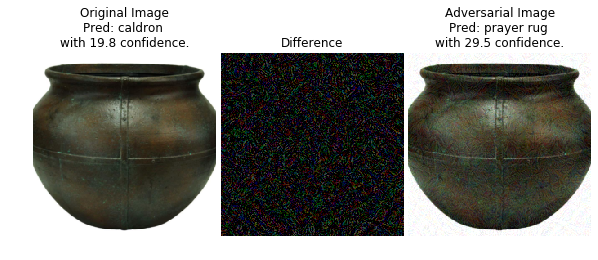

In [44]:
one_call.attack('https://images.homedepot-static.com/productImages/89b0cb1d-6ce3-4fe1-8495-878efbc3ef14/svn/copper-patina-mpg-plant-pots-pf5870cp-64_1000.jpg', atk=attacks.PGD, y=741)

## DeepFool

Now, let's try our hands-on DeepFool.

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.india.com:443
DEBUG:urllib3.connectionpool:https://www.india.com:443 "GET /wp-content/uploads/2018/08/Cannon-main-3815.jpg HTTP/1.1" 200 None
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


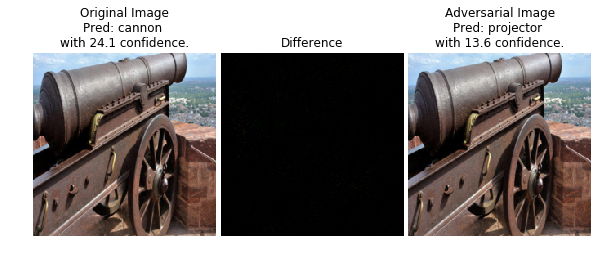

In [45]:
one_call.attack('https://www.india.com/wp-content/uploads/2018/08/Cannon-main-3815.jpg', atk=attacks.DeepFool)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): cdn.ecommercedns.uk:80
DEBUG:urllib3.connectionpool:http://cdn.ecommercedns.uk:80 "GET /files/9/210639/3/2173433/celtic-tree-cuirass-steel.jpg HTTP/1.1" 200 177940
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


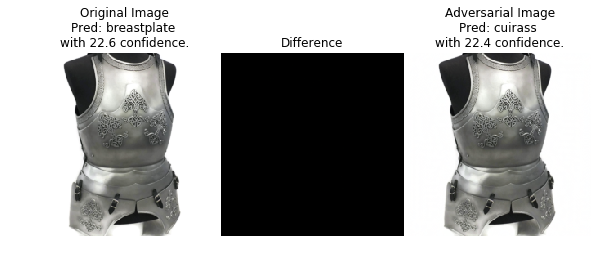

In [46]:
one_call.attack('http://cdn.ecommercedns.uk/files/9/210639/3/2173433/celtic-tree-cuirass-steel.jpg', atk=attacks.DeepFool)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): 5.imimg.com:443
DEBUG:urllib3.connectionpool:https://5.imimg.com:443 "GET /data5/HX/LC/MY-37035335/adult-pull-up-diaper-500x500-500x500.jpg HTTP/1.1" 200 22511
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


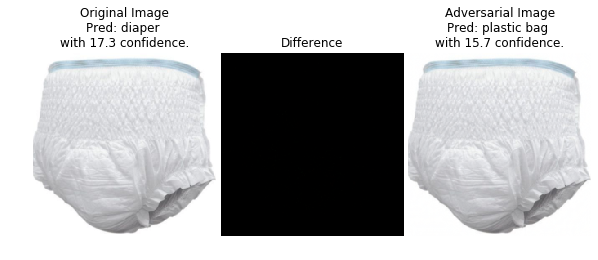

In [47]:
one_call.attack('https://5.imimg.com/data5/HX/LC/MY-37035335/adult-pull-up-diaper-500x500-500x500.jpg', atk=attacks.DeepFool)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.theglobeandmail.com:443
DEBUG:urllib3.connectionpool:https://www.theglobeandmail.com:443 "GET /resizer/LunAcgG8o583sIYsGQU3mEwUHIQ=/1200x0/filters:quality(80)/arc-anglerfish-tgam-prod-tgam.s3.amazonaws.com/public/KVZ6E4TVK5CMZB6RQJ4WMRTNJQ.JPG HTTP/1.1" 200 125075
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


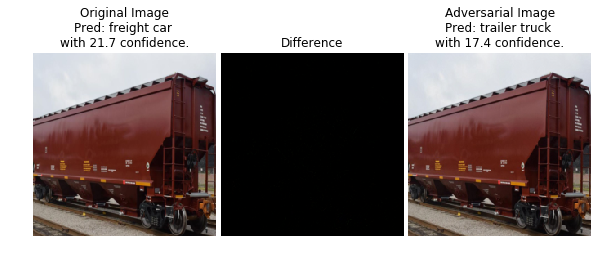

In [48]:
one_call.attack('https://www.theglobeandmail.com/resizer/LunAcgG8o583sIYsGQU3mEwUHIQ=/1200x0/filters:quality(80)/arc-anglerfish-tgam-prod-tgam.s3.amazonaws.com/public/KVZ6E4TVK5CMZB6RQJ4WMRTNJQ.JPG', atk=attacks.DeepFool)

## Conclusion

Hope you had a good time playing around in this notebook :)

You can find the article here:

And the Github Repository here: github.com/iarunava/scratchai